In [129]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [130]:
data = pd.read_csv('D3.csv')

In [131]:
data

,humidity,precipMM,tempC,Common cold,Dengue,HeatStroke
0,72,0.0,18,0,0,0
1,72,0.0,19,0,0,0
2,72,0.0,18,0,0,0
3,72,0.0,18,0,0,0
4,68,0.0,20,0,0,0
...,...,...,...,...,...,...
116131,28,0.0,30,0,0,1
116132,29,0.0,29,0,0,0
116133,30,0.0,27,0,0,0
116134,31,0.0,26,0,0,0


In [132]:
data.describe()

,humidity,precipMM,tempC,Common cold,Dengue,HeatStroke
count,116136.000000,116136.000000,116136.000000,116136.000000,116136.000000,116136.000000
mean,57.646001,0.231727,25.304720,0.109398,0.092994,0.112489
std,25.316012,0.802657,4.659629,0.312139,0.290426,0.315968
min,4.000000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,22.000000,0.000000,0.000000,0.000000
50%,58.000000,0.000000,24.000000,0.000000,0.000000,0.000000
75%,82.000000,0.100000,28.000000,0.000000,0.000000,0.000000
max,100.000000,25.700000,43.000000,1.000000,1.000000,1.000000


In [133]:
 data['Dengue'].value_counts()

Dengue
0    105336
1     10800
Name: count, dtype: int64

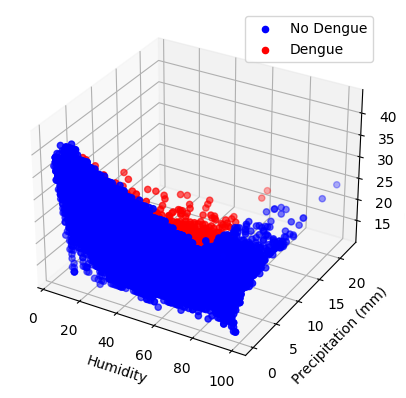

In [134]:

data = data.head(50000)
# Extracting columns for plotting
x = data['humidity']
y = data['precipMM']
z = data['tempC']
heat_stroke = data['Dengue']

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors based on HeatStroke
ax.scatter(x[heat_stroke == 0], y[heat_stroke == 0], z[heat_stroke == 0], c='b', marker='o', label='No Dengue')
ax.scatter(x[heat_stroke == 1], y[heat_stroke == 1], z[heat_stroke == 1], c='r', marker='o', label='Dengue')

# Labels
ax.set_xlabel('Humidity')
ax.set_ylabel('Precipitation (mm)')
ax.set_zlabel('Temperature (°C)')

# Legend
ax.legend()

plt.show()

In [135]:
data.groupby('Dengue').mean()

,humidity,precipMM,tempC,Common cold,HeatStroke
Dengue,,,,,
0,57.859332,0.196017,25.162788,0.093670,0.126189
1,67.353330,0.632867,27.046518,0.306558,0.023132


In [136]:
# separating the data and labels
X = data.drop(columns = 'Dengue', axis=1)
Y = data['Dengue']

In [137]:
# print(X,Y)

In [138]:

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [139]:

standardized_data = scaler.transform(X)

In [140]:
# print(standardized_data)

In [141]:

X = standardized_data
Y = data['Dengue']

In [142]:
data.columns


Index(['humidity', 'precipMM', 'tempC', 'Common cold', 'Dengue', 'HeatStroke'], dtype='object')

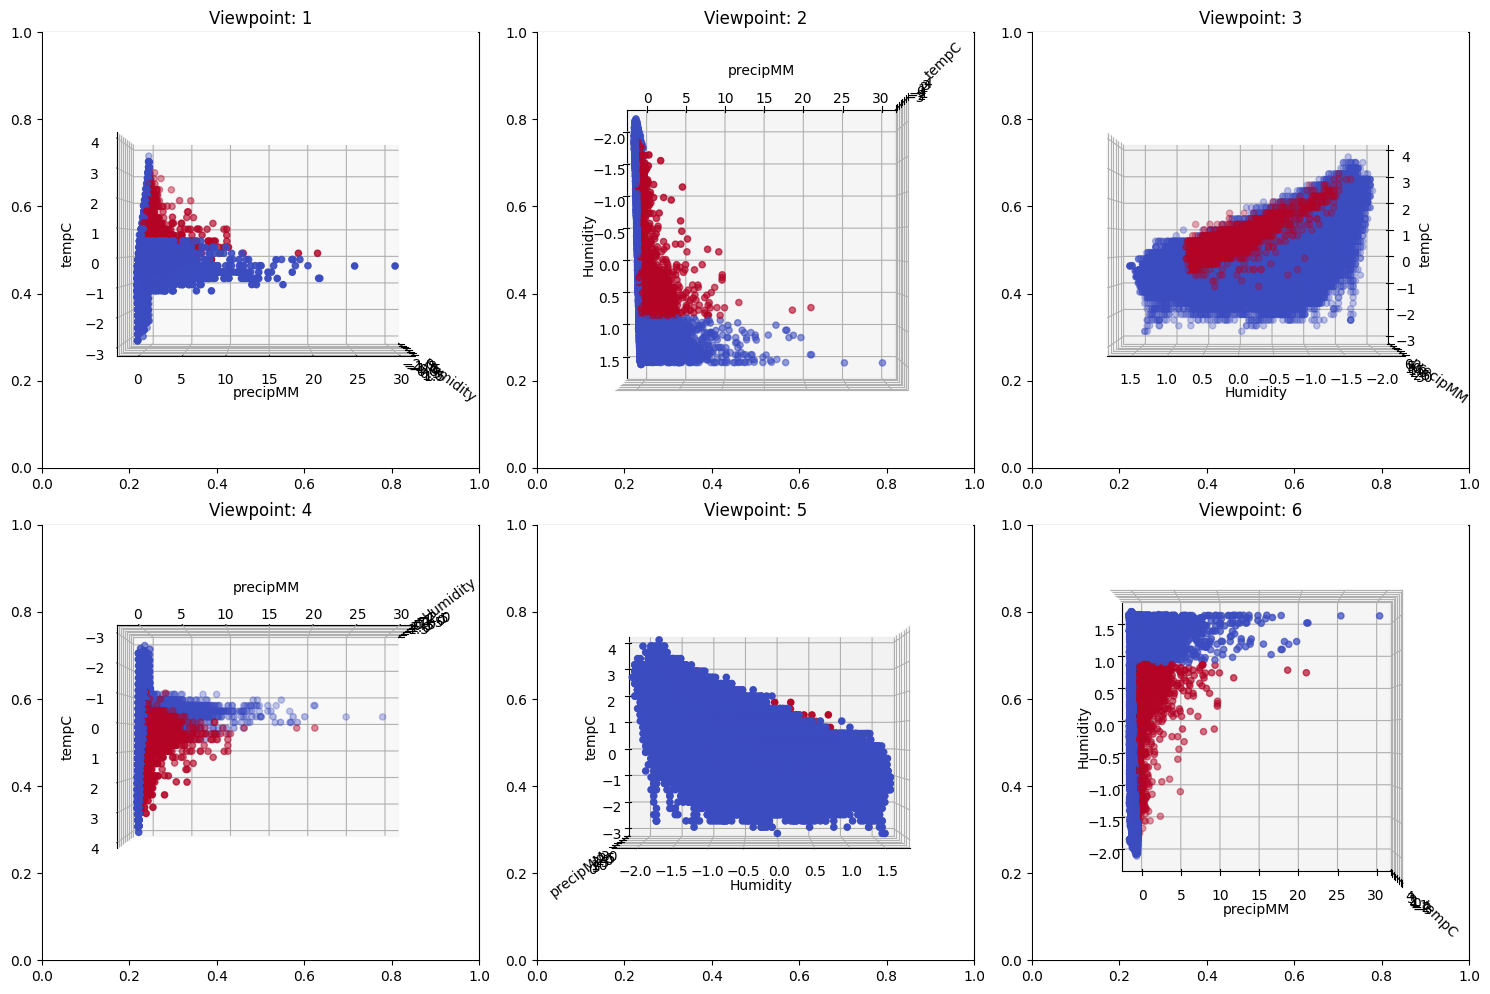

In [143]:
feature1 = X[:, 0]
feature2 = X[:, 1]
feature3 = X[:, 2]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

viewpoints = [(0, 0), (90, 0), (0, 90), (180, 0), (0, -90), (-90, 0)]

for i, ax in enumerate(axs.flat):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.scatter(feature1, feature2, feature3, c=Y, cmap='coolwarm', marker='o')
    
    ax.set_xlabel('Humidity')
    ax.set_ylabel('precipMM')
    ax.set_zlabel('tempC')
    ax.set_title('Viewpoint: {}'.format(i+1))
    ax.view_init(elev=viewpoints[i][0], azim=viewpoints[i][1])


plt.tight_layout()
plt.show()

In [144]:
counts = Y.value_counts()

print("Count of 0:", counts[0])
print("Count of 1:", counts[1])

Count of 0: 46066
Count of 1: 3934


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [146]:
counts = Y_train.value_counts()

print("Count of 0:", counts[0])
print("Count of 1:", counts[1])

Count of 0: 36853
Count of 1: 3147


In [147]:
# counts = Y_test.value_counts()

# print("Count of 0:", counts[0])
# print("Count of 1:", counts[1])

In [148]:

print(X.shape, X_train.shape, X_test.shape)

(50000, 5) (40000, 5) (10000, 5)


In [149]:
# classifier = svm.SVC(kernel='linear')
classifier = svm.SVC(kernel='rbf')

In [150]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC()

In [151]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [152]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9908


In [153]:

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [154]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9921


In [155]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate predictions
# Y_train_prediction = classifier.predict(X_train)
# Y_test_prediction = classifier.predict(X_test)
Y_train_prediction = X_train_prediction
Y_test_prediction = X_test_prediction

# Calculate precision, recall, and F1-score for training data
train_precision = precision_score(Y_train, Y_train_prediction)
train_recall = recall_score(Y_train, Y_train_prediction)
train_f1_score = f1_score(Y_train, Y_train_prediction)

# Calculate precision, recall, and F1-score for test data
test_precision = precision_score(Y_test, Y_test_prediction)
test_recall = recall_score(Y_test, Y_test_prediction)
test_f1_score = f1_score(Y_test, Y_test_prediction)

# Print evaluation metrics for both training and test data
print("Training Data:")
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1_score)
print("\nTest Data:")
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1_score)

# Classification report
print("\nClassification Report for Test Data:")
print(classification_report(Y_test, Y_test_prediction))

# Confusion Matrix
print("\nConfusion Matrix for Test Data:")
print(confusion_matrix(Y_test, Y_test_prediction))


Training Data:
Precision: 0.9763455605073705
Recall: 0.9049888782967906
F1-score: 0.9393139841688654

Test Data:
Precision: 0.9836065573770492
Recall: 0.9148665819567979
F1-score: 0.9479921000658327

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9213
           1       0.98      0.91      0.95       787

    accuracy                           0.99     10000
   macro avg       0.99      0.96      0.97     10000
weighted avg       0.99      0.99      0.99     10000


Confusion Matrix for Test Data:
[[9201   12]
 [  67  720]]


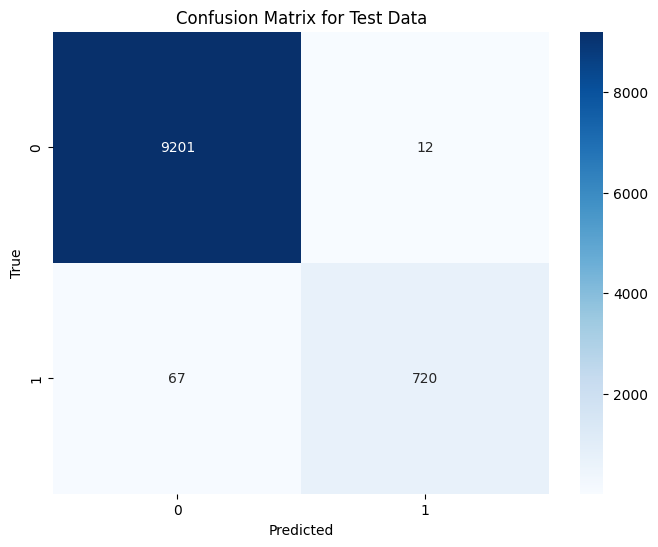

In [156]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for test data
cm = confusion_matrix(Y_test, Y_test_prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
